# Amplitude Spectrum -  a simple tutorial

This tutorial shall provide a simple practical introduction to amplitude spectra

In [6]:
# Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

A spectrum characterizes the "spectral content" of a function, i.e. which frequency contributes linearly to the function. 

### Example 1: Gauss function 

Exercise: Alter the frequency content of the Gaussian signal by varying f0 (e.g., 10, 20, 50, 100 Hz) and see the effect on the amplitude spectrum. What happens with the spectrum if keep f0 constant and you change dt?

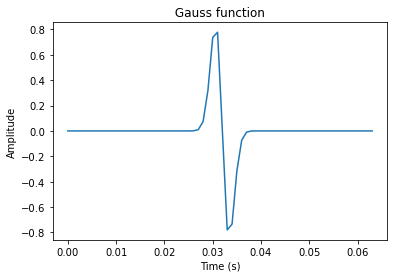

In [7]:
# Let us generate a Gauss function in time (actually the first derivative of it)
nt = 10000   # number of samples
dt = 0.001      # the sampling interval in s
f0   = 125.     # dominant frequency of the source (Hz)
t0   = 4. / f0 # source time shift from origin

# Initialize the function
f  = np.zeros(nt + 1)
t = np.linspace(0 * dt, nt * dt, nt)
# 1st derivative of a Gaussian
f  = -8. * (t - t0) * f0  * (np.exp(-1.0 * (4*f0)**2 * (t - t0) ** 2))

# Let us plot it
plt.plot(t[:np.int(2*t0/dt)],f[:np.int(2*t0/dt)])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(' Gauss function ')
plt.show()

### Let us calculate and plot the spectrum

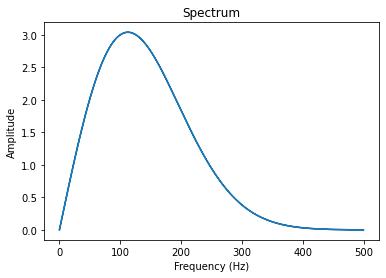

In [8]:
# Calculate and plot spectrum
spec = np.fft.fft(f) # source time function in frequency domain
freq = np.fft.fftfreq(spec.size, d = dt ) # time domain to frequency domain

plt.plot(np.abs(freq), np.abs(spec)) # plot frequency and amplitude
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


### Example 2: Time series and amplitude spectrum for various functions

Exercise: Choose the function of your liking, discuss the results! Add other functions of your liking, and checkout their spectral properties! Be creative!

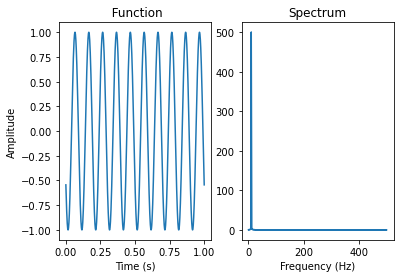

In [9]:
# Initialitze functions in time, uncomment the one you want to use!

# Time and sampling interval
nt = 1000   # number of samples
dt = 0.001      # the sampling interval in s
t = np.linspace(0, nt * dt, nt) # Initialize time axis

#####################################################

# Case 1: Delta function
# Try to put in words what this means!!!
#f = t * 0.
#f[100] = 1.

# Case 2: Sin function
T = 100*dt    # period
f = np.sin (2*np.pi/T*t+10)

# Case 3: Signal with three different harmonic frequencies
# Check whether the frequencies are correct!
#T1 = 10*dt    # period
#T2 = 40*dt    # period
#T3 = 100*dt    # period
#f = np.sin(2*np.pi/T1*t) + np.cos(2*np.pi/T2*t)  + np.sin(2*np.pi/T3*t) 

# Case 4: random function
# Why the spike of the spectrum at the left?
#f = np.random.rand(nt)
#f[0] = 0.
#f[nt-1] = 0.

# Case 5: Gaussian function (bell shape)
# Change the half width a (smaller, larger), what happens to the spectrum?
#a = 100*dt
#f = np.exp(-1/a**2*t**2)

# Case X: Your functions


#########################################################

# Spectrum
spec = np.fft.fft(f) # source time function in frequency domain
freq = np.fft.fftfreq(spec.size, d = dt ) # time domain to frequency domain

# Plotting

plt.subplot(121)
plt.plot(t,f)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('  Function ')

plt.subplot(122)
plt.plot(np.abs(freq), np.abs(spec)) # plot frequency and amplitude
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.show()


# Inverse transform

C:\Users\Igel\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


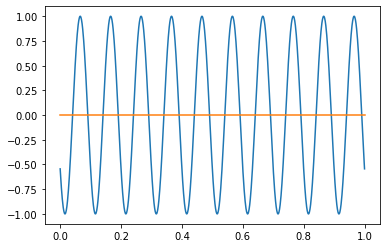

In [10]:
# Invert the spectrum to obtain original function

f_orig = np.fft.ifft(spec)

plt.plot(t,f_orig,t,f-f_orig)